# Resources
- https://www.kaylinpavlik.com/classifying-songs-genres/
```
$ track.artist             <chr> "Ed Sheeran", "Zara Lars"…
$ track.popularity         <int> 68, 72, 69, 74, 70, 69, …
$ track.album.id           <chr> "2oCs0DGTsRO98Gh5ZSl2Cx"…
$ track.album.name         <chr> "I Don't Care (with Just"…
$ track.album.release_date <chr> "2019-06-14", "2019-07-0"…
$ playlist_name            <chr> "Pop Remix", "Pop Remix"…
$ playlist_id              <chr> "37i9dQZF1DXcZDD7cfEKhW"…
$ playlist_genre           <chr> "pop", "pop", "pop", "po"…
$ playlist_subgenre        <chr> "dance pop", "dance pop"…
$ danceability             <dbl> 0.748, 0.675, 0.493, 0.5…
```


In [1]:
import seaborn as sns
import bokeh as bk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pydash as _
from concurrent.futures import as_completed, ThreadPoolExecutor
import sys
sys.path.append('../')
from _functions import *
from math import ceil
e = ThreadPoolExecutor(max_workers=25)

{'limit': 50}


ic| len(data): 100
ic| len(data): 150
ic| len(data): 200
ic| len(data): 234


In [2]:

def retrieveGenre(label):
    tracks = retrieve(TRACK, pid=pname(label)['id'])
    return tracks

def getAudioFeatures(tracks):
    #divide into lists of 50
    lsts = []
    for i in range(ceil(len(tracks)/50)): #ciel
        lsts.append([t['track']['id'] for t in tracks[i*50:(i+1)*50]])

    # We can use a with statement to ensure threads are cleaned up promptly
    data = []#{}
    def reduceFeatures(features):
#         res = {}
#         for track in features:
#             for key in [
#                 'acousticness',
#                 'danceability',
#                 'duration_ms',
#                 'energy',
#                 'instrumentalness',
#                 'liveness',
#                 'loudness',
#                 'speechiness',
#                 'tempo',
#                 'time_signature',
#                 'valence',
#             ]:
#                 res[key] = features[key]
        del features['track_href']
        del features['uri']
        del features['analysis_url']
        del features['type']
        del features['mode']
        del features['key']
        del features['id']
        del features['time_signature']
    
        return features
#     jprint(sp.audio_features(lsts[0]))
    with ThreadPoolExecutor(max_workers=5) as executor:
        # Start the load operations and mark each future with its URL
        future_to_features = {executor.submit(sp.audio_features, lst): lst for lst in lsts}
                         #for url in URLS}
        for future in as_completed(future_to_features):
            features = future_to_features[future]
            try:
                res = future.result()
            except Exception as exc:
                print('%r generated an exception: %s' % (features, exc))
            else:
                for trkfeat in res: #track in tracks
#                     data[trkfeat['id']] = reduceFeatures(trkfeat)
                    data.append(reduceFeatures(trkfeat)) #assume no dup
#     jprint(data)

    return data

{'limit': 50, 'user': '9nn10v4j29fr9iibaccbhehp4', 'playlist_id': '2vWnzs82vG0hONT4MMwG37'}


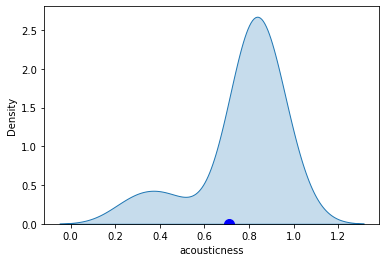

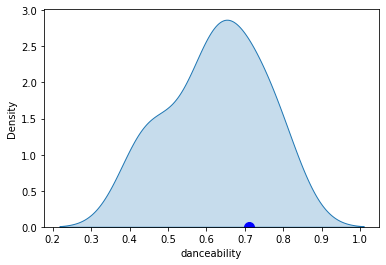

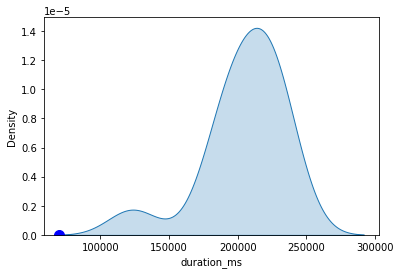

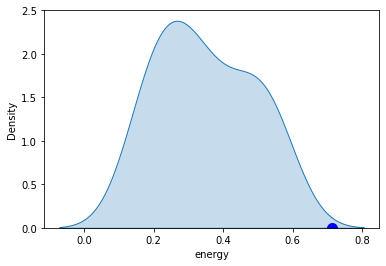

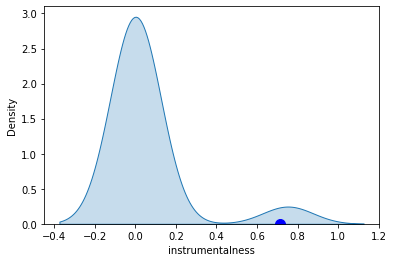

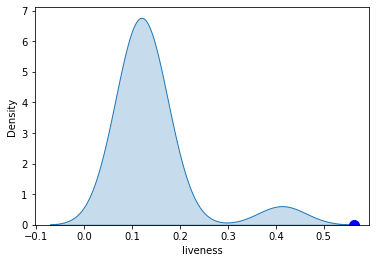

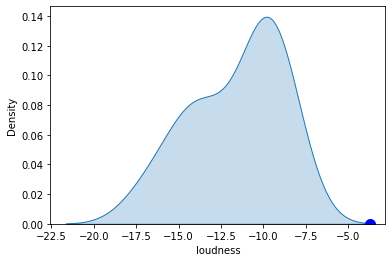

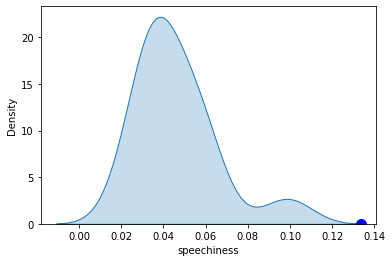

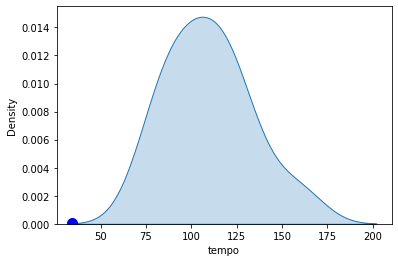

ValueError: Could not interpret value `time_signature` for parameter `x`

In [9]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
#     return array[idx]
    return idx

for i in [
    'Folk & Acoustic',
    'Hip Hop'
]:
    genre = retrieveGenre(i)
    res = getAudioFeatures(genre)
    # res[0].values
    # data = pandas.DataFrame.from_dict(res)
    data = pd.DataFrame(res)
    # data.head(10)
    # sns.kdeplot(data=data, x="duration_ms") #normalize ot o-1
    for key in [
        'acousticness',
        'danceability',
        'duration_ms',
        'energy',
        'instrumentalness',
        'liveness',
        'loudness',
        'speechiness',
        'tempo',
        'time_signature',
        'valence',
    ]:
        ax = sns.kdeplot(data=data, x=key, fill=True) # random subsections
        # b = sns.kdeplot(data=data, x="speechiness")
        x, y = ax.get_children()[0].get_paths()[0].vertices.T
        maxid = find_nearest(x, 0.713) #y.argmax()
    #     print(maxid)
    #     print(y[maxid])
    #     print(y[maxid-5: maxid+5])
    #     print(y)
        plt.plot(x[maxid], y[maxid], 'bo', ms=10)
        plt.show()

In [4]:
genre

[{'added_at': '2021-09-10T23:58:37Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/9nn10v4j29fr9iibaccbhehp4'},
   'href': 'https://api.spotify.com/v1/users/9nn10v4j29fr9iibaccbhehp4',
   'id': '9nn10v4j29fr9iibaccbhehp4',
   'type': 'user',
   'uri': 'spotify:user:9nn10v4j29fr9iibaccbhehp4'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6l3HvQ5sa6mXTsMTB19rO5'},
      'href': 'https://api.spotify.com/v1/artists/6l3HvQ5sa6mXTsMTB19rO5',
      'id': '6l3HvQ5sa6mXTsMTB19rO5',
      'name': 'J. Cole',
      'type': 'artist',
      'uri': 'spotify:artist:6l3HvQ5sa6mXTsMTB19rO5'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR'